### Consuming a Machine Learning Model

In **server.ipynb** we used the fastAPI which allows us to interact with our API through its built-in client. However, you might wonder how you can interact with your API using regular code and not some UI.

To do so, we provide you with this notebook in which you can check how a minimal client in Python looks like. For this, **leave the server running** (don't interrupt the kernel or close this window) and open also this client.ipynb notebook.

In this notebook we will code a minimal client that uses Python's requests library to interact with your running server.

In [1]:
import os
import io
import cv2
import requests
import numpy as np
from IPython.display import Image, display

In [2]:
base_url = 'http://localhost:8000'
endpoint = '/predict'
model = 'yolov3-tiny'

To consume your model, you append the endpoint to the base URL to get the full URL. Notice that the parameters are absent for now.

In [3]:
url_with_endpoint_no_params = base_url + endpoint
url_with_endpoint_no_params

'http://localhost:8000/predict'

To set any of the expected parameters, the syntax is to add a "?" character followed by the name of the parameter and its value.

This endpoint expects both a model's name and an image. But since the image is more complex it is not passed within the URL. Instead we leverage the requests library to handle this process.

In [7]:
full_url = url_with_endpoint_no_params + "?model=" + model
full_url

'http://localhost:8000/predict?model=yolov3-tiny'

### Sending a request to your server
#### Coding the response_from_server() function
This endpoint expects a POST HTTP request. The post function is part of the requests library.

To pass the file along with the request, you need to create a dictionary indicating the name of the file ('file' in this case) and the actual file.

In [4]:
def response_from_server(url, image_file, verbose=True):
    """Makes a POST request to the server and returns the response.

    Args:
        url (str): URL that the request is sent to.
        image_file (_io.BufferedReader): File to upload, should be an image.
        verbose (bool): True if the status of the response should be printed. False otherwise.

    Returns:
        requests.models.Response: Response from the server.
    """
    
    files = {'file': image_file}
    response = requests.post(url, files=files)
    status_code = response.status_code
    if verbose:
        msg = "Everything went well!" if status_code == 200 else "There was an error when handling the request."
        print(msg)
    return response

In [8]:
with open("images/clock2.jpeg", "rb") as image_file:
    prediction = response_from_server(full_url, image_file)

Everything went well!


The request was successful. However, you are not getting any information about the objects in the image.

To get the image with the bounding boxes and labels, you need to parse the content of the response into an appropriate format. 

In [9]:
dir_name = "images_predicted"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

#### Creating the display_image_from_response() function

Display image within server's response.

In [10]:
def display_image_from_response(response):
    """Display image within server's response.

    Args:
        response (requests.models.Response): The response from the server after object detection.
    """
    
    image_stream = io.BytesIO(response.content)
    image_stream.seek(0)
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    filename = "image_with_objects.jpeg"
    cv2.imwrite(f'images_predicted/{filename}', image)
    display(Image(f'images_predicted/{filename}'))

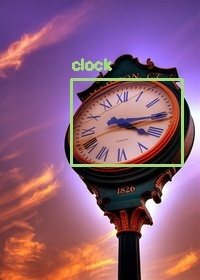

In [11]:
display_image_from_response(prediction)

Now you are ready to consume your object detection model through your own client!

Let's test it out on some other images:

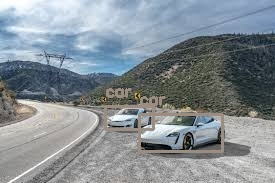

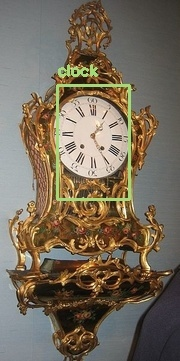

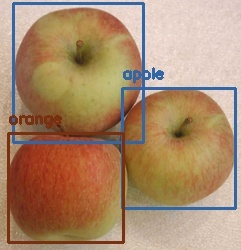

In [13]:
image_files = [
    'car2.jpeg',
    'clock3.jpeg',
    'apples.jpeg'
]

for image_file in image_files:
    with open(f"images/{image_file}", "rb") as image_file:
        prediction = response_from_server(full_url, image_file, verbose=False)
    
    display_image_from_response(prediction)